# 量子鍵配布

## 1. はじめに

アリスとボブが安全でないチャネル (インターネットなど) を介して秘密のメッセージ (ボブのオンライン バンキングの詳細など) を通信したい場合、メッセージを暗号化することが不可欠です。暗号化は広い分野であり、そのほとんどすべてがこの教科書の範囲外であるため、アリスとボブが誰も知らない秘密鍵を持っていることは有用であり、対称鍵暗号化を使用して通信できると信じる必要があります。

アリスとボブがイブの古典的な通信チャネルを使用して鍵を共有したい場合、イブがこの鍵のコピーを自分用に作成したかどうかを判断することは不可能です。アリスとボブは、イブが聞いていないという完全な信頼をイブに置かなければなりません。しかし、イブが量子通信チャネルを提供すれば、アリスとボブはイブをまったく信頼する必要がなくなり、彼女がボブのメッセージをアリスに届く前に読もうとしたかどうかが分かるでしょう。

一部の読者にとっては、量子チャネルが物理的にどのように実装されるかについてのアイデアを与えることが役立つかもしれません。古典的なチャネルの例としては、電話回線が挙げられます。私たちはメッセージ (またはビット) を表す電気信号をラインを通じて送信します。量子通信チャネルの例として提案されているのは、ある種の光ファイバー ケーブルであり、これを通じて個々の光子 (光の粒子) を送信できます。光子には*偏光と呼ばれる特性があり、*この偏光は 2 つの状態のいずれかになります。これを使用して量子ビットを表すことができます。

## 2. プロトコルの概要

このプロトコルは、量子ビットを測定するとその状態が変化する可能性があるという事実を利用しています。アリスがボブに量子ビットを送信し、盗聴者 (イブ) がボブより先に量子ビットを測定しようとした場合、イブの測定によって量子ビットの状態が変化し、ボブはアリスが送信した量子ビットの状態を受信できない可能性があります。 

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

アリスが状態 $|+\rangle$ ( $X$ 基底では`0` ) で量子ビットを準備し、ボブがそれを $X$ 基底で測定すると、ボブは必ず`0`を測定します。

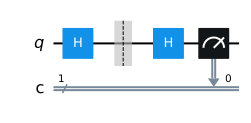

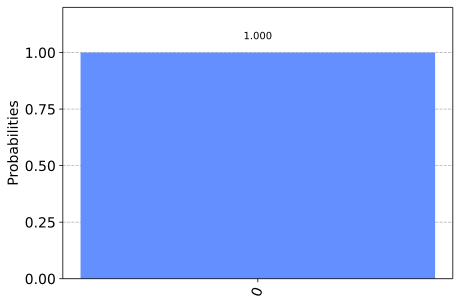

In [2]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

しかし、イブがボブに到達する前にこの量子ビットを $Z$ ベースで測定しようとすると、彼女は量子ビットの状態を $|+\rangle$ から $|0\rangle$ または $|1\rangle$ に変更します。ボブはもはや`0`を測定することを確信していません:

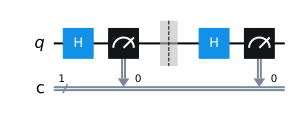

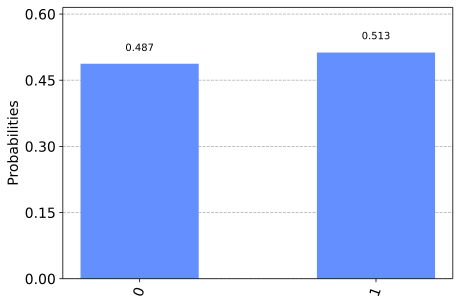

In [3]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

ここで、ボブが`1`測定できる確率が 50% であることがわかります。測定した場合、ボブとアリスは自分たちのチャネルに問題があることがわかります。

量子鍵配布プロトコルでは、このプロセスを十分な回数繰り返すことで、盗聴者が傍受を逃れる可能性はごくわずかです。おおよそ次のとおりです。

**- ステップ1**

アリスはランダムなビットの文字列を選択します。例:

`1000101011010100`

そして、各ビットの基底をランダムに選択します。

`ZZXZXXXZXZXXXXXX`

アリスはこれら 2 つの情報を自分だけの秘密にしておきます。

**- ステップ2**

次に、アリスは、選択した基底を使用して各ビットを量子ビットの文字列にエンコードします。これは、各量子ビットが、ランダムに選択された $|0\rangle$、$|1\rangle$、$|+\rangle$、または $|-\rangle$ のいずれかの状態にあることを意味します。この場合、量子ビットの文字列は次のようになります。

$$ |1\rangle|0\rangle|+\rangle|0\rangle|-\rangle|+\rangle|-\rangle|0\rangle|-\rangle|1\rangle|+\rangle|-\rangle|+\rangle|-\rangle|+\rangle|+\rangle
$$

これは彼女がボブに送ったメッセージです。

**- ステップ 3**

次に、ボブは各量子ビットをランダムに測定します。たとえば、次のような基底を使用します。

`XZZZXZXZXZXZZZXZ`

そしてボブは測定結果を非公開にします。

**- ステップ 4**

次に、ボブとアリスは、各量子ビットにどの基底を使用したかを公開します。ボブがアリスが準備したのと同じ基準で量子ビットを測定した場合、彼らはこれを共有秘密鍵の一部を形成するために使用します。そうでない場合は、そのビットの情報を破棄します。

**- ステップ5**

最後に、ボブとアリスは鍵のランダムなサンプルを共有し、サンプルが一致した場合、(わずかな誤差で) 送信が成功したことを確信できます。


## 3. Qiskit の例: インターセプトなし

まず、誰も聞いていないときにプロトコルがどのように機能するかを見てみましょう。次に、アリスとボブがどのようにして盗聴者を検出できるかを見てみましょう。いつものように、必要なものをすべてインポートすることから始めましょう。

疑似ランダムキーを生成するには、numpy の`randint`関数を使用します。このページの結果を確実に再現できるように、シードを 0 に設定します。

In [4]:
np.random.seed(seed=0)

アリスの最初のメッセージの長さを`n`と呼びます。この例では、アリスは 100 量子ビット長のメッセージを送信します。

In [5]:
n = 100

### 3.1 ステップ 1:

アリスはランダムなビットのセットを生成します。

In [6]:
np.random.seed(seed=0)
n = 100
## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


現時点では、ビットのセット「 `alice_bits` 」はアリスのみが知っています。どの情報がアリスだけが知っているか、どの情報がボブだけが知っているか、そしてイブのチャネルを介して送信された情報を次のような表に記録します。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  | &nbsp;

### 3.2 ステップ 2:

アリスは、量子ビット上の各ビットを $X$ または $Z$ ベースでランダムにエンコードすることを選択し、各量子ビットの選択を`alice_bases`に保存します。この場合、 `0` 「$Z$ ベースで準備する」を意味し、 `1` 「$X$ ベースで準備する」ことを意味します。

In [7]:
np.random.seed(seed=0)
n = 100
## Step 1
#Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


アリスもこの知識を非公開にしています。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  | &nbsp;

以下の関数`encode_message` 、それぞれがアリスのメッセージ内の単一の量子ビットを表す`QuantumCircuit`のリストを作成します。

In [8]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [9]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

`alices_bits`の最初のビットが`0`であり、これをエンコードする基底が $X$ 基底 ( `1`で表される) であることがわかります。

In [10]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])

bit = 0
basis = 1


そして、 `message`内の最初の回路 (アリスのメッセージ内の最初の量子ビットを表す) を表示すると、アリスが $|+\rangle$ 状態の量子ビットを準備したことを確認できます。

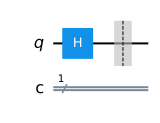

In [11]:
message[0].draw()

別の例として、 `alice_bits`の 4 番目のビットが`1`であり、これが $Z$ ベースでエンコードされていることがわかります。Alice は、対応する量子ビットを $|1\rangle$ 状態に準備します。

bit = 1
basis = 0


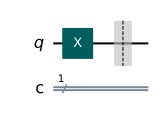

In [12]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw()

この量子ビットのメッセージは、イブの量子チャネルを介してボブに送信されます。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ

### 3.3 ステップ 3:

次に、ボブは $X$ または $Z$ ベースで各量子ビットをランダムに測定し、この情報を保存します。

In [13]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


`bob_bases`ボブが各量子ビットを測定する基準の選択を保存します。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース

以下では、関数`measure_message`対応する測定を適用し、各量子ビットの測定結果をシミュレートします。測定結果は`bob_results`に保存されます。

In [14]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [15]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

`message[0]`の回路 (0 番目の量子ビットを表す) に、Bob によって $X$ 測定値が追加されていることがわかります。

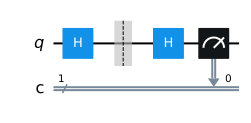

In [16]:
message[0].draw()

ボブは偶然、アリスが量子ビットをエンコードしたのと同じ基底で測定することを選択したため、ボブは結果`0`を取得することが保証されます。 6 番目の量子ビット (以下に示す) では、ボブがランダムに選択した測定値はアリスの測定結果と同じではなく、ボブの結果がアリスの結果と一致する確率は 50% のみです。 

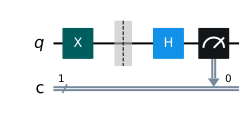

In [17]:
message[6].draw()

In [18]:
print(bob_results)

[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]


ボブは自分の結果を非公開にしています。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results

### 3.4 ステップ 4:

この後、アリスはどの量子ビットがどの基底でエンコードされたかを（イブのチャネルを通じて）明らかにします。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results
 | アリスベース | アリスベース

そしてボブは、どの基礎で各量子ビットを測定したかを明らかにします。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results
 | アリスベース | アリスベース
ボブベース | ボブベース | &nbsp;

ボブがたまたまアリスが準備したのと同じ基準でビットを測定した場合、これは`bob_results`のエントリが`alice_bits`の対応するエントリと一致し、そのビットをキーの一部として使用できることを意味します。異なるベースで測定した場合、ボブの結果はランダムになり、両方ともそのエントリを破棄します。これを行う関数`remove_garbage`は次のとおりです。

In [19]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

アリスとボブは両方とも無駄なビットを破棄し、残りのビットを使用して秘密鍵を作成します。

In [20]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results
 | アリスベース | アリスベース
ボブベース | ボブベース |
アリスキー |  | &nbsp;

In [21]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results
 | アリスベース | アリスベース
ボブベース | ボブベース |
アリスキー |  | ボブキー

### 3.5 ステップ 5:

最後に、ボブとアリスは、ランダムに選択したキー内のビットを比較して、プロトコルが正しく機能していることを確認します。

In [22]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

アリスとボブは両方ともこれらをパブリックにブロードキャストし、秘密ではなくなったのでキーから削除します。

In [23]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results
 | アリスベース | アリスベース
ボブベース | ボブベース |
アリスキー |  | ボブキー
ボブサンプル | ボブサンプル | ボブサンプル
アリス_サンプル | アリス_サンプル | アリス_サンプル

プロトコルが干渉なく正しく機能した場合、サンプルは以下と一致するはずです。

In [24]:
bob_sample == alice_sample

True

サンプルが一致する場合、(高い確率で) `alice_key == bob_key`を意味します。メッセージの暗号化に使用できる秘密キーを共有するようになりました。

アリスの知識 | イブのチャンネルを通じて | ボブの知識
:-: | :-: | :-:
アリスビット |  |
アリスベース |  |
メッセージ | メッセージ | メッセージ
 |  | ボブベース
 |  | bob_results
 | アリスベース | アリスベース
ボブベース | ボブベース |
アリスキー |  | ボブキー
ボブサンプル | ボブサンプル | ボブサンプル
アリス_サンプル | アリス_サンプル | アリス_サンプル
共有キー |  | 共有キー

In [25]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
key length = 33


## 4. Qiskit の例: インターセプト*あり*

ここで、アリスとボブがイブが量子メッセージを盗聴しようとしているかどうかをどのように判断できるかを見てみましょう。干渉がない場合と同じ手順を繰り返しますが、ボブが量子ビットを受け取る前に、イブは量子ビットから情報を抽出しようとします。別のシードを設定して、再現可能な「ランダム」結果の特定のセットを取得しましょう。

In [26]:
np.random.seed(seed=3)

### 4.1 ステップ 1:

アリスはランダムなビットのセットを生成します。

In [27]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
print(alice_bits)

[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1]


### 4.2 ステップ 2:

アリスはこれらを $Z$ ベースと $X$ ベースでランダムにエンコードし、イブの量子チャネルを通じてボブに送信します。

In [28]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


この場合、アリスのメッセージの最初の量子ビットは $|+\rangle$ 状態になります。

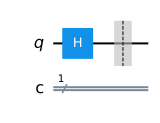

In [29]:
message[0].draw()

### 傍受！

なんてこった！イブは、自分のチャネルを通過するメッセージを傍受します。彼女は、ボブが後で行うのと同じ方法で、ランダムに選択した基底で量子ビットを測定しようとします。

In [30]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]


以下に量子ビット 0 のケースを示します。 Eve の基底のランダムな選択は、Alice の基底と同じではありません。これにより、量子ビットの状態が $|+\rangle$ から $Z$ 基底のランダムな状態に変更され、50% の確率で $|0\rangle$ になります。または $|1\rangle$:

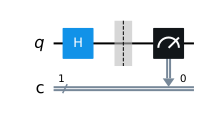

In [31]:
message[0].draw()

### 4.3 ステップ 3:

その後、イブは量子ビットをボブに渡し、ボブは量子ビットをランダムに測定します。この場合、ボブは、アリスが量子ビットを準備したのと同じ基底で測定することを (偶然に) 選択しました。傍受がなければ、ボブは`0`を測定することが保証されますが、イブがメッセージを読み取ろうとしたため、測定できる確率は 50% になります。代わりに`1` 。

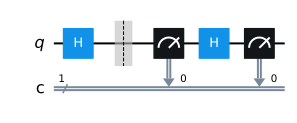

In [32]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
## Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
message[0].draw()

### 4.4 ステップ 4:

ボブとアリスは基本的な選択を明らかにし、無駄な部分を破棄します。

In [33]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
## Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
## Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

### 4.5 ステップ 5:

ボブとアリスは、同じランダムに選択した鍵を比較して、量子ビットが傍受されたかどうかを確認します。

In [34]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
## Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
## Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
alice_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [35]:
bob_sample == alice_sample

False

なんてこった！ボブのキーとアリスのキーが一致しません。これは、イブがステップ 2 とステップ 3 の間でメッセージを読み取ろうとし、量子ビットの状態を変更したためであることがわかります。アリスとボブが知っている限りでは、これはチャネル内のノイズが原因である可能性がありますが、いずれにせよ、すべての結果を破棄して再試行する必要があります。イブの傍受の試みは失敗しました。

## 5. リスク分析

イブがすべての量子ビットを測定するこのタイプの傍受の場合、ボブとアリスのサンプルが一致する可能性はわずかですがあり、アリスはイブのチャネルを通じて脆弱なメッセージを送信します。その可能性を計算して、量子鍵配布がどれほど危険であるかを見てみましょう。

- アリスとボブが量子ビットの結果を使用するには、両方とも同じ基底を選択する必要があります。イブもこの基準を選択した場合、エラーを引き起こすことなくこのビットを正常に傍受できます。これが起こる確率は 50% です。
- イブが*間違った*基準を選択した場合、つまりアリスとボブとは異なる基準を選択した場合でも、ボブがアリスが送信しようとした値を測定する可能性は依然として 50% あります。この場合、傍受も検出されません。
- しかし、イブが*間違った*基準を選択した場合、つまりアリスとボブとは異なる基準を選択した場合、ボブがアリスが送信しようとした値を測定しない可能性が 50% あり、これによりキーにエラーが発生し*ます*。


<img src="images/qkd_risk.svg">

アリスとボブが鍵の 1 ビットを比較した場合、ビットが一致する確率は $0.75$ で、一致した場合、彼らはイブの傍受に気付かないでしょう。 2 ビットを測定した場合、$0.75^2 = 0.5625$ の確率で傍受に気付かない可能性があります。イブが検出されない確率は、アリスとボブが比較するために選択したビット数 ($x$) から計算できることがわかります。

$$ P(\text{undetected}) = 0.75^x $$

上記のように 15 ビットを比較することにした場合、Eve が検出されない可能性は 1.3% です。これが危険すぎる場合は、代わりに 50 ビットを比較することもできます。これにより、知らないうちにスパイされる可能性が 0.00006% になります。

以下のセルを実行すると、プロトコルを再試行できます。 `sample_size`を低い値に変更して、イブがアリスとボブのキーを傍受するのがいかに簡単かを確認してください。

In [36]:
n = 100
# Step 1
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
# Step 2
message = encode_message(alice_bits, alice_bases)
# Interception!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
# Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
# Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
# Step 5
sample_size = 15 # Change this to something lower and see if 
                 # Eve can intercept the message without Alice
                 # and Bob finding out
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

Eve's interference was detected.


In [37]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
